<a href="https://colab.research.google.com/github/NnekaAsuzu/analyzedataset.github.io/blob/main/Nneka__Assignment_2_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Analysis. **🏘**

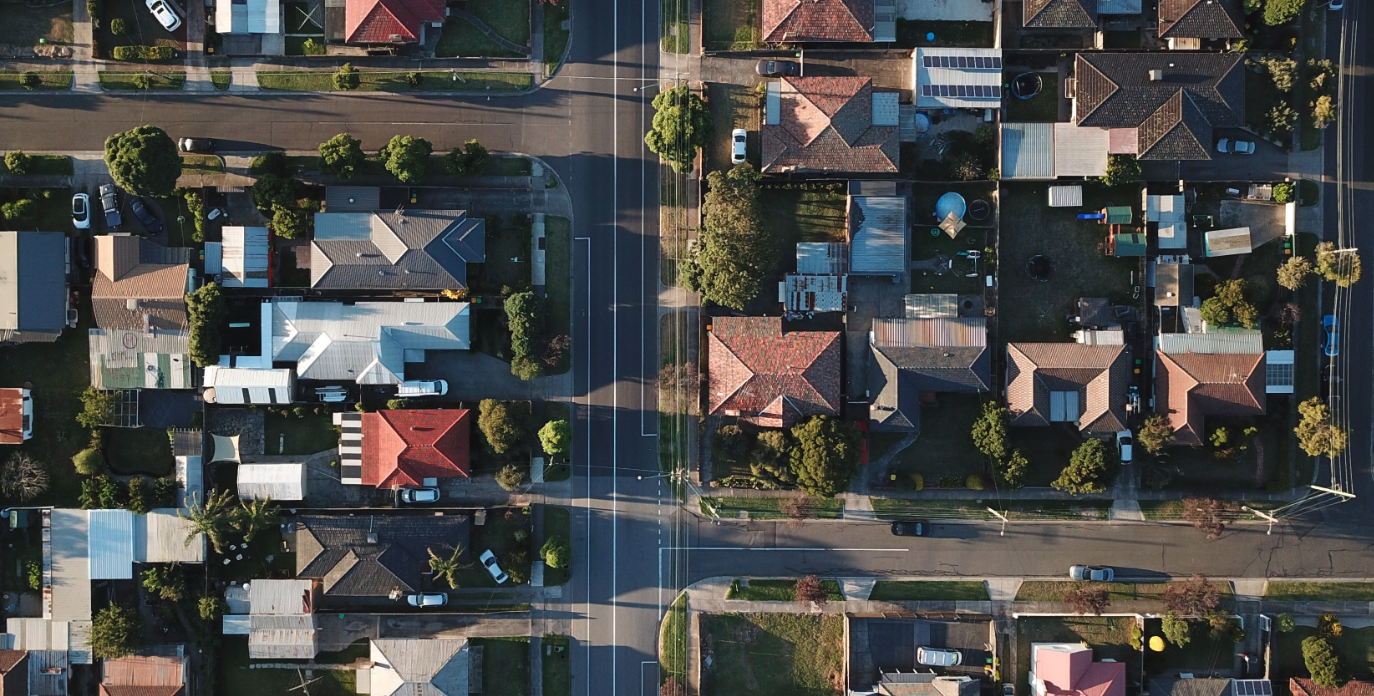

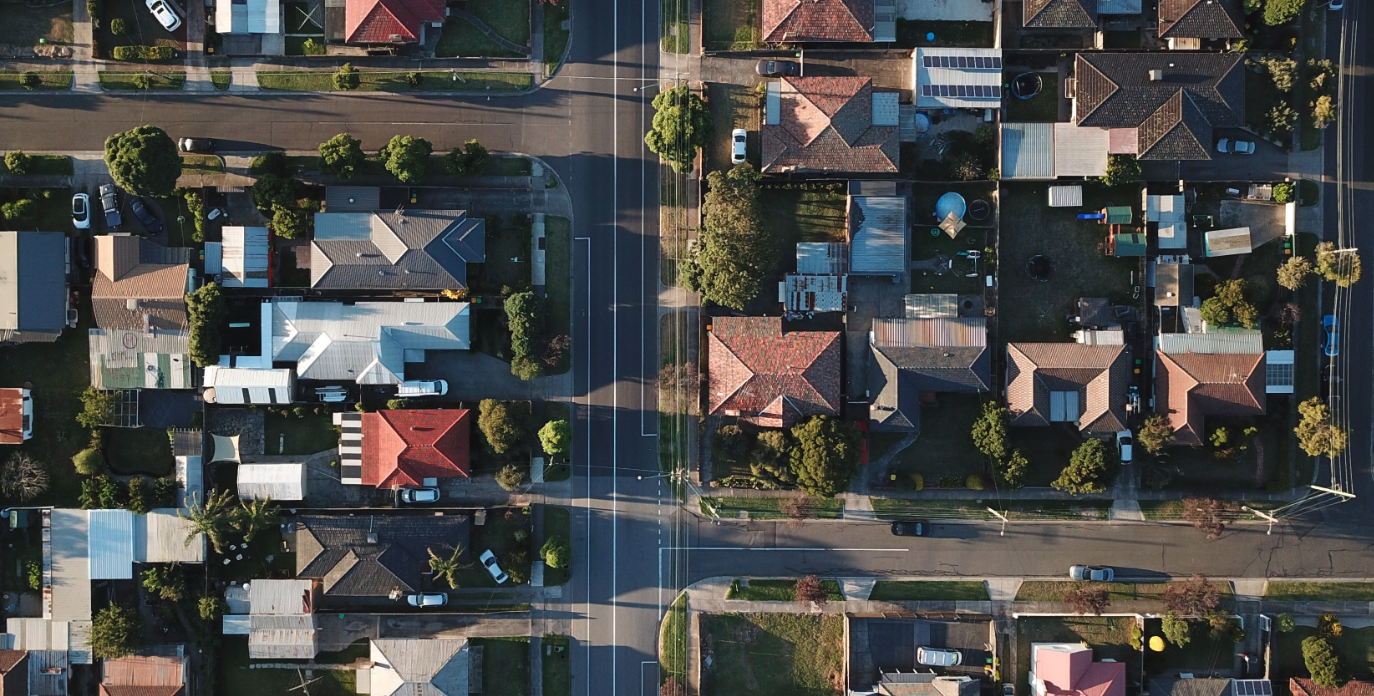





Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

###You can install any dependencies using pip

In [ ]:
!pip install skimpy
!pip install colorama
!pip install termcolor
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.1/114.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4

###Import Packages here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import datetime
from geopy.distance import geodesic
from pandas.tseries.offsets import DateOffset
from datetime import datetime

import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error





Helpful functions

In [ ]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

def first_looking(df):
    '''
    Gives a statistical breakdown of the data.
    '''
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')

    print(colored("Descriptive Statistics \n", attrs=['bold']), df.describe().round(2),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')


def first_look(df, col):
    """
    Prints basic information about a column in a Pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze.
    col : str
        The name of the column to analyze.

    Returns:
    --------
    None.

    Prints:
    -------
    column name    : str
        The name of the column being analyzed.
    per_of_nulls   : float
        The percentage of null values in the column.
    num_of_nulls   : int
        The number of null values in the column.
    num_of_uniques : int
        The number of unique values in the column.
    shape_of_df    : tuple
        The shape of the DataFrame.
    The unique values in the column and their frequency of occurrence.
    """
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() * 100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("shape_of_df    : ", df.shape)
    print("--------------------------------")
    print(df[col].value_counts(dropna=False))

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')


def visualize_data(df, column, plot_type='histogram', iqr_multiplier=1.5, **kwargs):
    """
    Visualizes a column from a DataFrame using the specified plot type.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        column (str): The name of the column to visualize.
        plot_type (str): The type of plot to create ('histogram', 'box', 'qq', 'bar', 'pie', 'all').
        iqr_multiplier (float): The multiplier for determining whisker length in box plots (default is 1.5).
        **kwargs: Additional keyword arguments for customizing the plot.

    Returns:
        None
    """
    data = df[column]

    if plot_type == 'all':
        plot_types = ['histogram', 'box', 'qq']
        for plot_type in plot_types:
            visualize_data(df, column, plot_type=plot_type, iqr_multiplier=iqr_multiplier, **kwargs)
    else:
        if plot_type == 'histogram':
            plt.figure(figsize=(10, 6))
            sns.histplot(data, kde=True, **kwargs)

            skewness = data.skew()
            kurtosis = data.kurtosis()
            mean = data.mean()
            median = data.median()
            mode = data.mode().iloc[0]
            title = f'Histogram of {column}\n\n'
            title += f'Skewness: {skewness:.2f}, '
            title += f'Kurtosis: {kurtosis:.2f}\n'
            title += f'Mean: {mean:.2f}, '
            title += f'Median: {median:.2f}, '
            title += f'Mode: {mode:.2f}'
            plt.title(title, fontweight='bold')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()
        elif plot_type == 'box':

            mean = np.mean(data)
            median = np.median(data)
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            upper_whisker = q3 + iqr_multiplier * iqr
            lower_whisker = q1 - iqr_multiplier * iqr
            min_whisker = np.min(data[data >= lower_whisker])
            max_whisker = np.max(data[data <= upper_whisker])

            num_below_min_whisker = np.sum(data < lower_whisker)
            num_above_max_whisker = np.sum(data > upper_whisker)
            plt.figure(figsize=(10, 6))
            sns.boxplot(y=data, **kwargs)
            plt.title(f'Box Plot of {column}\n\nMean: {mean:.2f}, Median: {median:.2f}, Min Whisker: {min_whisker:.2f}, Max Whisker: {max_whisker:.2f}\nIQR Multiplier: {iqr_multiplier}\n\nNumber of Extreme Values in Below Min Whisker: {num_below_min_whisker}\n Number of Extreme Values in Above Max Whisker: {num_above_max_whisker}', fontweight="bold")
            plt.ylabel(column)
            plt.show()
        elif plot_type == 'qq':

            plt.figure(figsize=(10, 6))
            stats.probplot(data, dist="norm", plot=plt)
            plt.title(f'Q-Q Plot of {column}\nNormality Check',  fontweight='bold')
            plt.xlabel('Theoretical Quantiles')
            plt.ylabel('Sample Quantiles')
            plt.show()
        elif plot_type == 'bar':
            value_counts = data.value_counts()
            x = value_counts.index
            y = value_counts.values
            total_height = sum(y)
            percentages = [(count / total_height) * 100 for count in y]
            fig, ax = plt.subplots(figsize=(10, 6))
            bars = ax.barh(x, percentages, **kwargs)
            # Horizontal bar chart
            plt.title(f'Bar Chart of {column}', fontweight='bold')
            plt.xlabel('Percentage')
            plt.ylabel(column)
            for bar, percentage in zip(bars, percentages):
                width = bar.get_width()
                ax.annotate(f'{percentage:.2f}%', xy=(width, bar.get_y() + bar.get_height() / 2),
                            xytext=(3, 0), textcoords='offset points', va='center')
            plt.show()
        elif plot_type == 'pie':
            value_counts = data.value_counts()
            labels = value_counts.index
            sizes = value_counts.values
            plt.figure(figsize=(8, 8))
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, **kwargs)
            plt.title(f'Pie Chart of {column}', fontweight='bold')
            plt.axis('equal')
            plt.show()


def scatter_or_joint_plot(data, x_col, y_col, title=None, x_label=None, y_label=None, kind='scatter', **kwargs):
    """
    Draws a scatter plot or joint plot on the given DataFrame.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        x_col (str): The column name for the x-axis.
        y_col (str): The column name for the y-axis.
        title (str, optional): The title of the plot. Defaults to None (uses column names).
        x_label (str, optional): The label for the x-axis. Defaults to None (uses column name).
        y_label (str, optional): The label for the y-axis. Defaults to None (uses column name).
        kind (str, optional): The type of the plot ('scatter' or 'joint'). Defaults to 'scatter'.
        **kwargs: Additional parameters for the scatter or joint plot.

    Returns:
        None
    """
    if title is None:
        title = f'Plot of {x_col} vs {y_col}'
    if x_label is None:
        x_label = x_col
    if y_label is None:
        y_label = y_col

    plt.figure(figsize=(10, 6))
    corr_coefficient = np.corrcoef(data[x_col], data[y_col])[0, 1]

    if kind == 'scatter':
        sns.scatterplot(data=data, x=x_col, y=y_col, **kwargs)
        title_with_corr = f'{title} (Scatter)\n\nCorrelation: {corr_coefficient:.2f}'
        plt.title(title_with_corr, fontweight='bold')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.grid(True)
    elif kind == 'joint':
        g = sns.jointplot(x=x_col, y=y_col, data=data, **kwargs)
        g.fig.suptitle(f'{title}', fontweight='bold', y=1.02)
        g.ax_joint.set_xlabel(x_label)
        g.ax_joint.set_ylabel(y_label)
        g.ax_marg_x.set_title(f'Correlation: {corr_coefficient:.2f}', fontweight='bold')
        plt.subplots_adjust(top=0.9)

    plt.show()

# STEP 1: **Reading and understanding the data.**

In [ ]:
path_to_file = "/content/housing_FULL.csv"
data = pd.read_csv(path_to_file)

data_copy = data.copy()

In [ ]:
data_copy.head()  #looking at the datasets

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [ ]:
data_copy.info #look at datasetproperties
#To understand more about the data, including the number of non-null records in each columns,
#their data types, the memory usage of the dataset, we use info( )

<bound method DataFrame.info of            Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       

In [ ]:
data_copy.shape  #look at data samples and columns in dateset
# to check the number of observations (rows) and features (columns) in the datase

(34857, 21)

In [ ]:
data_copy.describe() # look at dataset summary statistics

Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946     401.26706     37.328178   
min        0.000000      0.000000       0.000000       0.00000   1196.000000   
25%        1.000000      1.000000     224.000000     102.00000   1940.000000   
50%        2.000000      2.000000     521.000000     136.00000   1970.000000   
75%        2.000000      2.000000     670.000000     188.00000   2000.000000   
max       12.000000     26.000000  433014.000000   44515.00000   2106.000000   

          Lattitude    Longtitude  Propertycount  
count  26881.000000  26881.000000   34854.000000  
mean     -37.810634    145.001851    7572.888306  
std        0.090279      0.120169    4428.090313  
min      -38.190430    144.423790      83.000000  
25%      -37.862950    144.933500    4385.000000  
50%      -37.807600    145.007800    6763.000000  
75%      -37.754100    145.071900   10412.000000  
max      -37.390200    145.526350   21650.000000

In [ ]:
data_copy.columns  # to see all columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## **Find if any column has mixed data types**

In [ ]:
# Checking Mixed Type of Data:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''

    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_obj_columns(data_copy)

Column CouncilArea has mixed object types.
Column Regionname has mixed object types.


<ipython-input-10-ca095925cc11>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tdf = df.select_dtypes(include=['object']).applymap(type)


# STEP 2: **Perform EDA, and Data cleaning here**
In this section, you have to perform the following:
Handling missing data
Handling Outliers
Also, walk through your thought process of why this method is useful here.

In [ ]:
data_copy.describe(exclude=np.number).T

count unique                      top   freq
Suburb       34857    351                Reservoir    844
Address      34857  34009             5 Charles St      6
Type         34857      3                        h  23980
Method       34857      9                        S  19744
SellerG      34857    388                   Jellis   3359
Date         34857     78               28/10/2017   1119
CouncilArea  34854     33  Boroondara City Council   3675
Regionname   34854      8    Southern Metropolitan  11836

In [ ]:
data_copy.describe(exclude=np.number)

Suburb       Address   Type Method SellerG        Date  \
count       34857         34857  34857  34857   34857       34857   
unique        351         34009      3      9     388          78   
top     Reservoir  5 Charles St      h      S  Jellis  28/10/2017   
freq          844             6  23980  19744    3359        1119   

                    CouncilArea             Regionname  
count                     34854                  34854  
unique                       33                      8  
top     Boroondara City Council  Southern Metropolitan  
freq                       3675                  11836

### **Data Cleaning**

####**Removing Irrelevant Features-DROPPED COLUMNS**

In [ ]:
#Certain features removed from the dataset that I felt do not provide value to the analysis:predict house prices

# Drop columns that I felt where irrelevant to the goal of the project
data_copy.drop(columns=['SellerG','Car'], inplace=True)

#### **Removing Duplicate Rows-DUPLICATES**

In [ ]:
data_copy.duplicated()  #to check duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
34852    False
34853    False
34854    False
34855    False
34856    False
Length: 34857, dtype: bool

In [ ]:
data_copy[data_copy.duplicated()] # to see the duplicated columns

Suburb         Address  Rooms Type     Price Method        Date  \
12655      Coburg  69 Victoria St      3    t  720000.0     PI  29/04/2017   
15858  Nunawading   1/7 Lilian St      3    t       NaN     SP  17/06/2017   

       Distance  Postcode  Bedroom2  Bathroom  Landsize  BuildingArea  \
12655       7.8    3058.0       3.0       2.0     531.0         112.0   
15858      15.4    3131.0       3.0       3.0     405.0         226.0   

       YearBuilt              CouncilArea  Lattitude  Longtitude  \
12655     2016.0     Darebin City Council  -37.74240   144.95710   
15858     2000.0  Manningham City Council  -37.82678   145.16777   

                  Regionname  Propertycount  
12655  Northern Metropolitan        11204.0  
15858   Eastern Metropolitan         4973.0

In [ ]:
len(data_copy[data_copy.duplicated()]) # to see the number of duplicates in total

2

In [ ]:
# to see the number of dupicates total in statement
duplicated_values = len(data_copy[data_copy.duplicated()])

print(f"Number of duplicates: {duplicated_values}")

Number of duplicates: 2


In [ ]:
data_copy.drop_duplicates(inplace=True)  #remove duplicates

In [ ]:
len(data_copy[data_copy.duplicated()]) # to see the number of dupicates in total  #check to confirm duplicates removed

0

####**Convert data Types**

In [ ]:
data_copy.info()  #checking on data types in object

<class 'pandas.core.frame.DataFrame'>
Index: 34855 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34855 non-null  object 
 1   Address        34855 non-null  object 
 2   Rooms          34855 non-null  int64  
 3   Type           34855 non-null  object 
 4   Price          27246 non-null  float64
 5   Method         34855 non-null  object 
 6   Date           34855 non-null  object 
 7   Distance       34854 non-null  float64
 8   Postcode       34854 non-null  float64
 9   Bedroom2       26638 non-null  float64
 10  Bathroom       26629 non-null  float64
 11  Landsize       23045 non-null  float64
 12  BuildingArea   13740 non-null  float64
 13  YearBuilt      15549 non-null  float64
 14  CouncilArea    34852 non-null  object 
 15  Lattitude      26879 non-null  float64
 16  Longtitude     26879 non-null  float64
 17  Regionname     34852 non-null  object 
 18  Propertycou

In [ ]:
data_copy['Date']

0         3/09/2016
1         3/12/2016
2         4/02/2016
3         4/02/2016
4         4/03/2017
            ...    
34852    24/02/2018
34853    24/02/2018
34854    24/02/2018
34855    24/02/2018
34856    24/02/2018
Name: Date, Length: 34855, dtype: object

In [ ]:
data_copy['Date'] = pd.to_datetime(data_copy['Date'], format= "%d/%m/%Y")  #converting Date to date format

In [ ]:
data_copy.info() #Date has been converted to date format

<class 'pandas.core.frame.DataFrame'>
Index: 34855 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34855 non-null  object        
 1   Address        34855 non-null  object        
 2   Rooms          34855 non-null  int64         
 3   Type           34855 non-null  object        
 4   Price          27246 non-null  float64       
 5   Method         34855 non-null  object        
 6   Date           34855 non-null  datetime64[ns]
 7   Distance       34854 non-null  float64       
 8   Postcode       34854 non-null  float64       
 9   Bedroom2       26638 non-null  float64       
 10  Bathroom       26629 non-null  float64       
 11  Landsize       23045 non-null  float64       
 12  BuildingArea   13740 non-null  float64       
 13  YearBuilt      15549 non-null  float64       
 14  CouncilArea    34852 non-null  object        
 15  Lattitude      26879 non

####**Check for null values**

In [ ]:
data_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
data_copy.replace('NaN', float(np.nan), regex=True, inplace=True) #to see all null values even in object and classify them as null type

In [ ]:
data_copy.isnull().sum()  #the isnull() function is used to get an idea of the amount of missing values in our dataset.

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

####**Missing Value Imputation-Handle Missing Values and Replace**

In [ ]:
int(data_copy['Price'].mean())  #used mean method to replace missing values in price column

1050185

In [ ]:
data_copy['Price'].fillna(int(data_copy['Price'].mean()), inplace=True)

In [ ]:
int(data_copy['Distance'].mean())   #used mean method to replace missing values in Distance column

11

In [ ]:
data_copy['Distance'].fillna(int(data_copy['Distance'].mean()), inplace=True)

In [ ]:
int(data_copy['Postcode'].mean())   #used mean method to replace missing values in Postcode column

3116

In [ ]:
data_copy['Postcode'].fillna(int(data_copy['Postcode'].mean()), inplace=True)

In [ ]:
int(data_copy['Bedroom2'].mean())   #used mean method to replace missing values in Bedroom2 column

3

In [ ]:
data_copy['Bedroom2'].fillna(int(data_copy['Bedroom2'].mean()), inplace=True)

In [ ]:
int(data_copy['Bathroom'].mean()) #used mean method to replace missing values in Bathroom column

1

In [ ]:
data_copy['Bathroom'].fillna(int(data_copy['Bathroom'].mean()), inplace=True)  #used mean method to replace missing values in Bathroom column

In [ ]:
int(data_copy ['Landsize'].mean())  #used mean method to replace missing values in Landsize column

593

In [ ]:
data_copy['Landsize'].fillna(int(data_copy['Landsize'].mean()), inplace=True)

In [ ]:
int(data_copy['BuildingArea'].mean())   #used mean method to replace missing values in Building Area column

160

In [ ]:
data_copy['BuildingArea'].fillna(int(data_copy['BuildingArea'].mean()), inplace=True)

In [ ]:
int(data_copy['YearBuilt'].mean())   #used mean method to replace missing values in YearBuilt column

1965

In [ ]:
data_copy['YearBuilt'].fillna(int(data_copy['YearBuilt'].mean()), inplace=True)

In [ ]:
int(data_copy['Lattitude'].mean())   #used mean method to replace missing values in Lattitude column

-37

In [ ]:
data_copy['Lattitude'].fillna(int(data_copy['Lattitude'].mean()), inplace=True)

In [ ]:
int(data_copy['Longtitude'].mean())   #used mean method to replace missing values in Longtitude  column

145

In [ ]:
data_copy['Longtitude'].fillna(int(data_copy['Longtitude'].mean()), inplace=True)

In [ ]:
int(data_copy['Propertycount'].mean())   #used mean method to replace missing values in Propertycount  column

7572

In [ ]:
data_copy['Propertycount'].fillna(int(data_copy['Propertycount'].mean()), inplace=True)

In [ ]:
data_copy['CouncilArea'].value_counts() #used to see the category in this column

CouncilArea
Boroondara City Council           3675
Darebin City Council              2850
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1045
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston Cit

In [ ]:
data_copy['CouncilArea'].fillna(np.random.choice(data_copy['CouncilArea']), inplace=True) #used random choice method to replace values in CouncilArea column because the values are occuring at close frequency

In [ ]:
np.random.choice(data_copy['CouncilArea']) #to select random choices

'Boroondara City Council'

In [ ]:
data_copy['Regionname'].value_counts()   #used to see the category in this column

Regionname
Southern Metropolitan         11836
Northern Metropolitan          9556
Western Metropolitan           6799
Eastern Metropolitan           4376
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: count, dtype: int64

In [ ]:
data_copy['Regionname'].fillna(data_copy['Regionname'].mode()[0], inplace=True)  #used mode because one category is occuring more than others in the category listed above

In [ ]:
data_copy['Date'].fillna(pd.to_datetime('2023-01-01'), inplace=True)

In [ ]:
data_copy.isnull().sum()   #after applying all methods above, checked for missing values

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

*Now that all values are not null. Convert the mixed data types  

**Convert data Types**

In [ ]:
data_copy.info() #checking on data types in object

<class 'pandas.core.frame.DataFrame'>
Index: 34855 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34855 non-null  object        
 1   Address        34855 non-null  object        
 2   Rooms          34855 non-null  int64         
 3   Type           34855 non-null  object        
 4   Price          34855 non-null  float64       
 5   Method         34855 non-null  object        
 6   Date           34855 non-null  datetime64[ns]
 7   Distance       34855 non-null  float64       
 8   Postcode       34855 non-null  float64       
 9   Bedroom2       34855 non-null  float64       
 10  Bathroom       34855 non-null  float64       
 11  Landsize       34855 non-null  float64       
 12  BuildingArea   34855 non-null  float64       
 13  YearBuilt      34855 non-null  float64       
 14  CouncilArea    34855 non-null  object        
 15  Lattitude      34855 non

In [ ]:
data_copy['Date'] = pd.to_datetime(data_copy['Date'], format= "%d/%m/%Y") #converting Date to date format

In [ ]:
data_copy['YearBuilt'] = pd.to_numeric(data_copy['YearBuilt'], errors='coerce')  # Convert to numeric, replace non-numeric with NaN


In [ ]:
data_copy['YearBuilt'] = data_copy['YearBuilt'].astype('Int64') #convert YearBuilt column to integer

In [ ]:
data_copy['Price'] = data_copy['Price'].astype('int64') #convert price column to integer

In [ ]:
data_copy['Regionname'] = data_copy['Regionname'].astype(str)  #convert object data type to string

In [ ]:
data_copy['CouncilArea'] = data_copy['CouncilArea'].astype(str)  #convert object data type to string

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34855 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34855 non-null  object        
 1   Address        34855 non-null  object        
 2   Rooms          34855 non-null  int64         
 3   Type           34855 non-null  object        
 4   Price          34855 non-null  int64         
 5   Method         34855 non-null  object        
 6   Date           34855 non-null  datetime64[ns]
 7   Distance       34855 non-null  float64       
 8   Postcode       34855 non-null  float64       
 9   Bedroom2       34855 non-null  float64       
 10  Bathroom       34855 non-null  float64       
 11  Landsize       34855 non-null  float64       
 12  BuildingArea   34855 non-null  float64       
 13  YearBuilt      34855 non-null  Int64         
 14  CouncilArea    34855 non-null  object        
 15  Lattitude      34855 non

### **Find if any column has mixed data types**

In [ ]:
# Checking Mixed Type of Data:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''

    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_obj_columns(data_copy)

NO PROBLEM  with the data types of Columns in the DataFrame.


<ipython-input-64-ca095925cc11>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tdf = df.select_dtypes(include=['object']).applymap(type)


In [ ]:
data_copy

Suburb             Address  Rooms Type    Price Method       Date  \
0      Abbotsford       68 Studley St      2    h  1050185     SS 2016-09-03   
1      Abbotsford        85 Turner St      2    h  1480000      S 2016-12-03   
2      Abbotsford     25 Bloomburg St      2    h  1035000      S 2016-02-04   
3      Abbotsford  18/659 Victoria St      3    u  1050185     VB 2016-02-04   
4      Abbotsford        5 Charles St      3    h  1465000     SP 2017-03-04   
...           ...                 ...    ...  ...      ...    ...        ...   
34852  Yarraville         13 Burns St      4    h  1480000     PI 2018-02-24   
34853  Yarraville       29A Murray St      2    h   888000     SP 2018-02-24   
34854  Yarraville      147A Severn St      2    t   705000      S 2018-02-24   
34855  Yarraville    12/37 Stephen St      3    h  1140000     SP 2018-02-24   
34856  Yarraville    3 Tarrengower St      2    h  1020000     PI 2018-02-24   

       Distance  Postcode  Bedroom2  Bathroom  Landsize  BuildingArea  \
0           2.5    3067.0       2.0       1.0     126.0         160.0   
1           2.5    3067.0       2.0       1.0     202.0         160.0   
2           2.5    3067.0       2.0       1.0     156.0          79.0   
3           2.5    3067.0       3.0       2.0       0.0         160.0   
4           2.5    3067.0       3.0       2.0     134.0         150.0   
...         ...       ...       ...       ...       ...           ...   
34852       6.3    3013.0       4.0       1.0     593.0         160.0   
34853       6.3    3013.0       2.0       2.0      98.0         104.0   
34854       6.3    3013.0       2.0       1.0     220.0         120.0   
34855       6.3    3013.0       3.0       1.0     593.0         160.0   
34856       6.3    3013.0       2.0       1.0     250.0         103.0   

       YearBuilt               CouncilArea  Lattitude  Longtitude  \
0           1965        Yarra City Council  -37.80140   144.99580   
1           1965        Yarra City Council  -37.79960   144.99840   
2           1900        Yarra City Council  -37.80790   144.99340   
3           1965        Yarra City Council  -37.81140   145.01160   
4           1900        Yarra City Council  -37.80930   144.99440   
...          ...                       ...        ...         ...   
34852       1965  Maribyrnong City Council  -37.81053   144.88467   
34853       2018  Maribyrnong City Council  -37.81551   144.88826   
34854       2000  Maribyrnong City Council  -37.82286   144.87856   
34855       1965  Maribyrnong City Council  -37.00000   145.00000   
34856       1930  Maribyrnong City Council  -37.81810   144.89351   

                  Regionname  Propertycount  
0      Northern Metropolitan         4019.0  
1      Northern Metropolitan         4019.0  
2      Northern Metropolitan         4019.0  
3      Northern Metropolitan         4019.0  
4      Northern Metropolitan         4019.0  
...                      ...            ...  
34852   Western Metropolitan         6543.0  
34853   Western Metropolitan         6543.0  
34854   Western Metropolitan         6543.0  
34855   Western Metropolitan         6543.0  
34856   Western Metropolitan         6543.0  

[34855 rows x 19 columns]

##Interesting Find/Correlation

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


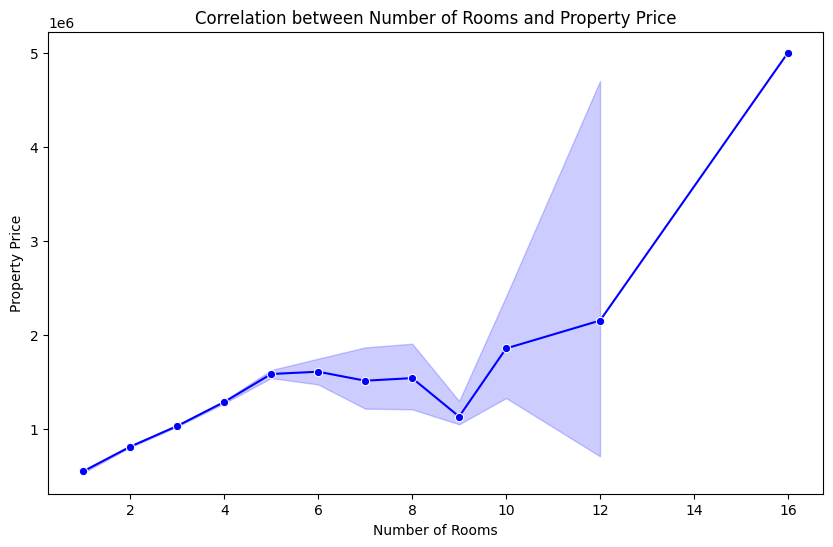

In [ ]:
# Line plot to explore the correlation between 'Rooms' and 'Price'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Rooms', y='Price', data=data_copy, marker='o', color='b')
plt.title('Correlation between Number of Rooms and Property Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Property Price')
plt.show()

<ipython-input-67-3fb82c861d21>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Type', y='Price', data=data_copy, ci=None)


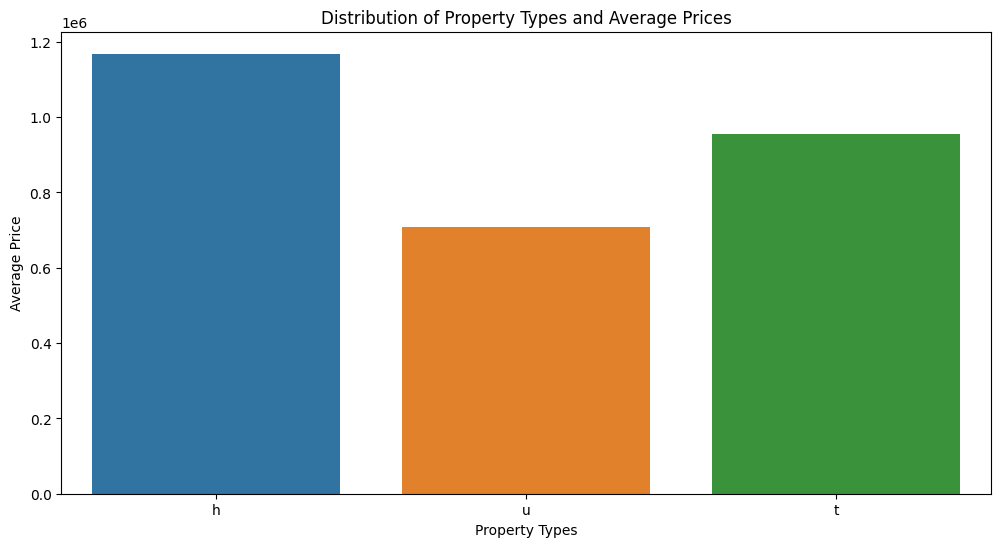

In [ ]:
# Bar plot to explore the distribution of property types and their average prices
#Property types label name meaning:h: House, Cottage, Villa, Semi, Terrace,
#Property types label name meaning:u: Unit, Duplex
#Property types label name meaning:t: Townhouse
plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Price', data=data_copy, ci=None)
plt.title('Distribution of Property Types and Average Prices')
plt.xlabel('Property Types')
plt.ylabel('Average Price')
plt.show()

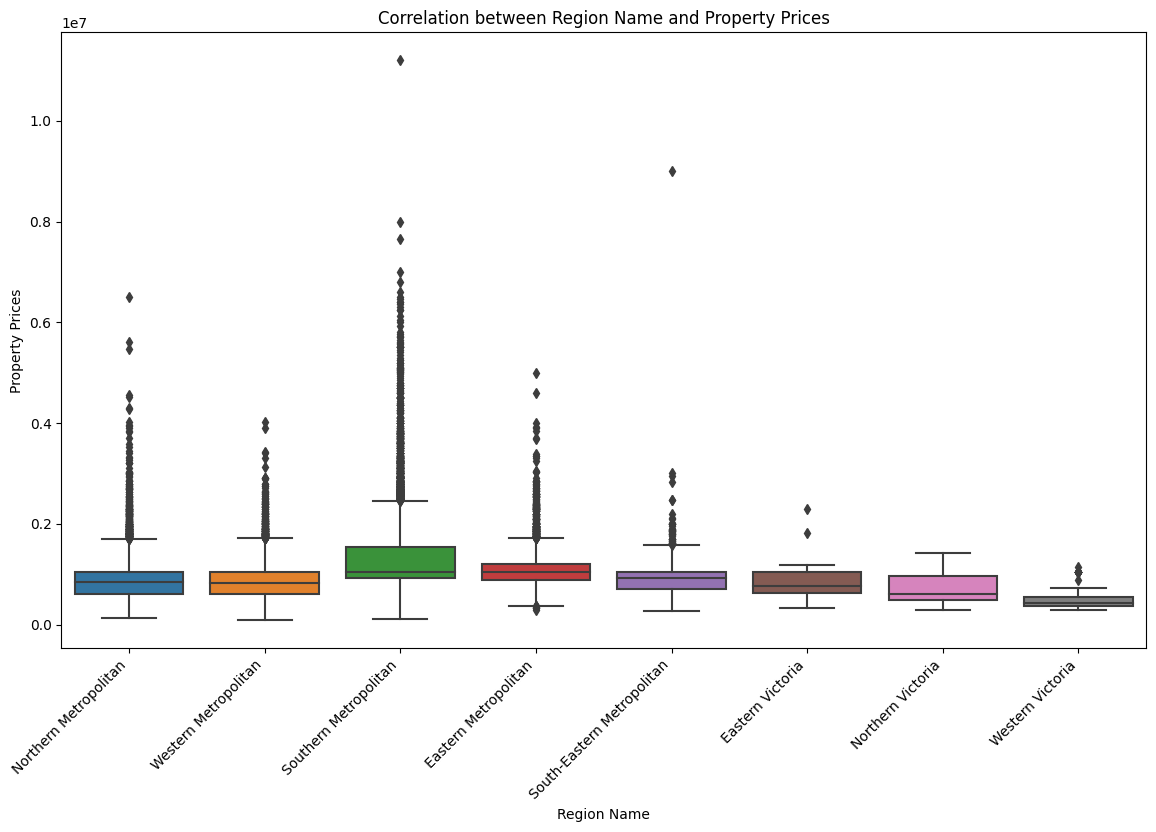

In [ ]:
# Box plot to explore the correlation between 'Distance' and property prices
plt.figure(figsize=(14, 8))
sns.boxplot(x='Regionname', y='Price', data=data_copy)
plt.title('Correlation between Region Name and Property Prices')
plt.xlabel('Region Name')
plt.ylabel('Property Prices')
plt.xticks(rotation=45, ha='right')
plt.show()

# STEP 3: **Feature Engineering**

Feature Engineering

Be innovative 💡

It is your time to show your creativity!

Hint: Create new features using the columns provided.

### Extract datetime features

In [ ]:
data_copy['Date'].dt.day

0         3
1         3
2         4
3         4
4         4
         ..
34852    24
34853    24
34854    24
34855    24
34856    24
Name: Date, Length: 34855, dtype: int32

In [ ]:
data_copy['month']=data_copy['Date'].dt.month

In [ ]:
#extract datetime features
data_copy['day']=data_copy['Date'].dt.day
data_copy['month']=data_copy['Date'].dt.month
data_copy['quarter']=data_copy['Date'].dt.quarter
data_copy['year']=data_copy['Date'].dt.year

#extract, week, month starting, month ending, quarter starting, quarter ending, year starting, year ending
data_copy['day_of_week']=data_copy['Date'].dt.day_of_week
data_copy['is_month_start']=data_copy['Date'].dt.is_month_start
data_copy['is_month_end']=data_copy['Date'].dt.is_month_end
data_copy['is_quarter_start']=data_copy['Date'].dt.is_quarter_start
data_copy['is_quarter_end']=data_copy['Date'].dt.is_quarter_end
data_copy['is_year_start']=data_copy['Date'].dt.is_year_start
data_copy['is_year_end']=data_copy['Date'].dt.is_year_end






In [ ]:
data_copy

Suburb             Address  Rooms Type    Price Method       Date  \
0      Abbotsford       68 Studley St      2    h  1050185     SS 2016-09-03   
1      Abbotsford        85 Turner St      2    h  1480000      S 2016-12-03   
2      Abbotsford     25 Bloomburg St      2    h  1035000      S 2016-02-04   
3      Abbotsford  18/659 Victoria St      3    u  1050185     VB 2016-02-04   
4      Abbotsford        5 Charles St      3    h  1465000     SP 2017-03-04   
...           ...                 ...    ...  ...      ...    ...        ...   
34852  Yarraville         13 Burns St      4    h  1480000     PI 2018-02-24   
34853  Yarraville       29A Murray St      2    h   888000     SP 2018-02-24   
34854  Yarraville      147A Severn St      2    t   705000      S 2018-02-24   
34855  Yarraville    12/37 Stephen St      3    h  1140000     SP 2018-02-24   
34856  Yarraville    3 Tarrengower St      2    h  1020000     PI 2018-02-24   

       Distance  Postcode  Bedroom2  ...  day  quarter  year  day_of_week  \
0           2.5    3067.0       2.0  ...    3        3  2016            5   
1           2.5    3067.0       2.0  ...    3        4  2016            5   
2           2.5    3067.0       2.0  ...    4        1  2016            3   
3           2.5    3067.0       3.0  ...    4        1  2016            3   
4           2.5    3067.0       3.0  ...    4        1  2017            5   
...         ...       ...       ...  ...  ...      ...   ...          ...   
34852       6.3    3013.0       4.0  ...   24        1  2018            5   
34853       6.3    3013.0       2.0  ...   24        1  2018            5   
34854       6.3    3013.0       2.0  ...   24        1  2018            5   
34855       6.3    3013.0       3.0  ...   24        1  2018            5   
34856       6.3    3013.0       2.0  ...   24        1  2018            5   

      is_month_start  is_month_end  is_quarter_start is_quarter_end  \
0              False         False             False          False   
1              False         False             False          False   
2              False         False             False          False   
3              False         False             False          False   
4              False         False             False          False   
...              ...           ...               ...            ...   
34852          False         False             False          False   
34853          False         False             False          False   
34854          False         False             False          False   
34855          False         False             False          False   
34856          False         False             False          False   

       is_year_start  is_year_end  
0              False        False  
1              False        False  
2              False        False  
3              False        False  
4              False        False  
...              ...          ...  
34852          False        False  
34853          False        False  
34854          False        False  
34855          False        False  
34856          False        False  

[34855 rows x 30 columns]

###Convert Price Currency

*Currently the houses prices are in Australian dollars and I want to convert it to Canadian dollars* $1 AUD equals to 0.90

In [ ]:
data_copy['HousePrices_CAD']=data_copy['Price']* 0.90

In [ ]:
data_copy.describe()

Rooms         Price                           Date  \
count  34855.000000  3.485500e+04                          34855   
mean       3.031014  1.050185e+06  2017-05-23 11:01:38.637211136   
min        1.000000  8.500000e+04            2016-01-28 00:00:00   
25%        2.000000  6.950000e+05            2016-11-19 00:00:00   
50%        3.000000  1.050185e+06            2017-07-08 00:00:00   
75%        4.000000  1.150000e+06            2017-10-28 00:00:00   
max       16.000000  1.120000e+07            2018-03-17 00:00:00   
std        0.969961  5.671492e+05                            NaN   

           Distance      Postcode      Bedroom2      Bathroom       Landsize  \
count  34855.000000  34855.000000  34855.000000  34855.000000   34855.000000   
mean      11.184900   3116.064094      3.064697      1.477292     593.403242   
min        0.000000   3000.000000      0.000000      0.000000       0.000000   
25%        6.400000   3051.000000      3.000000      1.000000     357.000000   
50%       10.300000   3103.000000      3.000000      1.000000     593.000000   
75%       14.000000   3156.000000      3.000000      2.000000     598.000000   
max       48.100000   3978.000000     30.000000     12.000000  433014.000000   
std        6.788928    109.024994      0.858115      0.686327    2763.773224   

       BuildingArea    YearBuilt     Lattitude    Longtitude  Propertycount  \
count  34855.000000      34855.0  34855.000000  34855.000000   34855.000000   
mean     160.100572  1965.126868    -37.625135    145.001424    7572.858643   
min        0.000000       1196.0    -38.190430    144.423790      83.000000   
25%      160.000000       1965.0    -37.846900    144.964400    4385.000000   
50%      160.000000       1965.0    -37.776590    145.000000    6763.000000   
75%      160.000000       1965.0    -37.634965    145.051745   10412.000000   
max    44515.000000       2106.0    -37.000000    145.526350   21650.000000   
std      251.950815    24.931293      0.349646      0.105530    4427.962175   

              month           day       quarter          year   day_of_week  \
count  34855.000000  34855.000000  34855.000000  34855.000000  34855.000000   
mean       7.142074     15.877349      2.684149   2016.839937      4.893100   
min        1.000000      1.000000      1.000000   2016.000000      0.000000   
25%        5.000000      9.000000      2.000000   2016.000000      5.000000   
50%        7.000000     17.000000      3.000000   2017.000000      5.000000   
75%       10.000000     24.000000      4.000000   2017.000000      5.000000   
max       12.000000     30.000000      4.000000   2018.000000      6.000000   
std        3.158839      8.316694      1.085566      0.636309      0.909292   

       HousePrices_CAD  
count     3.485500e+04  
mean      9.451668e+05  
min       7.650000e+04  
25%       6.255000e+05  
50%       9.451665e+05  
75%       1.035000e+06  
max       1.008000e+07  
std       5.104343e+05

###Age of the House

In [ ]:
current_year = datetime.now().year

In [ ]:
data_copy['house_age'] = current_year - data_copy['YearBuilt']

In [ ]:
print(data_copy[['YearBuilt', 'house_age']])

       YearBuilt  house_age
0           1965         59
1           1965         59
2           1900        124
3           1965         59
4           1900        124
...          ...        ...
34852       1965         59
34853       2018          6
34854       2000         24
34855       1965         59
34856       1930         94

[34855 rows x 2 columns]


In [ ]:
data_copy

Suburb             Address  Rooms Type    Price Method       Date  \
0      Abbotsford       68 Studley St      2    h  1050185     SS 2016-09-03   
1      Abbotsford        85 Turner St      2    h  1480000      S 2016-12-03   
2      Abbotsford     25 Bloomburg St      2    h  1035000      S 2016-02-04   
3      Abbotsford  18/659 Victoria St      3    u  1050185     VB 2016-02-04   
4      Abbotsford        5 Charles St      3    h  1465000     SP 2017-03-04   
...           ...                 ...    ...  ...      ...    ...        ...   
34852  Yarraville         13 Burns St      4    h  1480000     PI 2018-02-24   
34853  Yarraville       29A Murray St      2    h   888000     SP 2018-02-24   
34854  Yarraville      147A Severn St      2    t   705000      S 2018-02-24   
34855  Yarraville    12/37 Stephen St      3    h  1140000     SP 2018-02-24   
34856  Yarraville    3 Tarrengower St      2    h  1020000     PI 2018-02-24   

       Distance  Postcode  Bedroom2  ...  year  day_of_week  is_month_start  \
0           2.5    3067.0       2.0  ...  2016            5           False   
1           2.5    3067.0       2.0  ...  2016            5           False   
2           2.5    3067.0       2.0  ...  2016            3           False   
3           2.5    3067.0       3.0  ...  2016            3           False   
4           2.5    3067.0       3.0  ...  2017            5           False   
...         ...       ...       ...  ...   ...          ...             ...   
34852       6.3    3013.0       4.0  ...  2018            5           False   
34853       6.3    3013.0       2.0  ...  2018            5           False   
34854       6.3    3013.0       2.0  ...  2018            5           False   
34855       6.3    3013.0       3.0  ...  2018            5           False   
34856       6.3    3013.0       2.0  ...  2018            5           False   

       is_month_end is_quarter_start  is_quarter_end  is_year_start  \
0             False            False           False          False   
1             False            False           False          False   
2             False            False           False          False   
3             False            False           False          False   
4             False            False           False          False   
...             ...              ...             ...            ...   
34852         False            False           False          False   
34853         False            False           False          False   
34854         False            False           False          False   
34855         False            False           False          False   
34856         False            False           False          False   

      is_year_end  HousePrices_CAD  house_age  
0           False         945166.5         59  
1           False        1332000.0         59  
2           False         931500.0        124  
3           False         945166.5         59  
4           False        1318500.0        124  
...           ...              ...        ...  
34852       False        1332000.0         59  
34853       False         799200.0          6  
34854       False         634500.0         24  
34855       False        1026000.0         59  
34856       False         918000.0         94  

[34855 rows x 32 columns]

###Total Rooms

In [ ]:
data_copy['Total_Rooms']=data_copy['Rooms']+data_copy['Bedroom2']
print(data_copy[['Rooms', 'Bedroom2', 'Total_Rooms']])

       Rooms  Bedroom2  Total_Rooms
0          2       2.0          4.0
1          2       2.0          4.0
2          2       2.0          4.0
3          3       3.0          6.0
4          3       3.0          6.0
...      ...       ...          ...
34852      4       4.0          8.0
34853      2       2.0          4.0
34854      2       2.0          4.0
34855      3       3.0          6.0
34856      2       2.0          4.0

[34855 rows x 3 columns]


In [ ]:
data_copy

Suburb             Address  Rooms Type    Price Method       Date  \
0      Abbotsford       68 Studley St      2    h  1050185     SS 2016-09-03   
1      Abbotsford        85 Turner St      2    h  1480000      S 2016-12-03   
2      Abbotsford     25 Bloomburg St      2    h  1035000      S 2016-02-04   
3      Abbotsford  18/659 Victoria St      3    u  1050185     VB 2016-02-04   
4      Abbotsford        5 Charles St      3    h  1465000     SP 2017-03-04   
...           ...                 ...    ...  ...      ...    ...        ...   
34852  Yarraville         13 Burns St      4    h  1480000     PI 2018-02-24   
34853  Yarraville       29A Murray St      2    h   888000     SP 2018-02-24   
34854  Yarraville      147A Severn St      2    t   705000      S 2018-02-24   
34855  Yarraville    12/37 Stephen St      3    h  1140000     SP 2018-02-24   
34856  Yarraville    3 Tarrengower St      2    h  1020000     PI 2018-02-24   

       Distance  Postcode  Bedroom2  ...  day_of_week  is_month_start  \
0           2.5    3067.0       2.0  ...            5           False   
1           2.5    3067.0       2.0  ...            5           False   
2           2.5    3067.0       2.0  ...            3           False   
3           2.5    3067.0       3.0  ...            3           False   
4           2.5    3067.0       3.0  ...            5           False   
...         ...       ...       ...  ...          ...             ...   
34852       6.3    3013.0       4.0  ...            5           False   
34853       6.3    3013.0       2.0  ...            5           False   
34854       6.3    3013.0       2.0  ...            5           False   
34855       6.3    3013.0       3.0  ...            5           False   
34856       6.3    3013.0       2.0  ...            5           False   

       is_month_end  is_quarter_start is_quarter_end  is_year_start  \
0             False             False          False          False   
1             False             False          False          False   
2             False             False          False          False   
3             False             False          False          False   
4             False             False          False          False   
...             ...               ...            ...            ...   
34852         False             False          False          False   
34853         False             False          False          False   
34854         False             False          False          False   
34855         False             False          False          False   
34856         False             False          False          False   

       is_year_end HousePrices_CAD  house_age  Total_Rooms  
0            False        945166.5         59          4.0  
1            False       1332000.0         59          4.0  
2            False        931500.0        124          4.0  
3            False        945166.5         59          6.0  
4            False       1318500.0        124          6.0  
...            ...             ...        ...          ...  
34852        False       1332000.0         59          8.0  
34853        False        799200.0          6          4.0  
34854        False        634500.0         24          4.0  
34855        False       1026000.0         59          6.0  
34856        False        918000.0         94          4.0  

[34855 rows x 33 columns]

###Price Per Property Count

In [ ]:
#to represent the average property price in the neighborhood.

data_copy['Propertycount'] = pd.to_numeric(data_copy['Propertycount'], errors='coerce')  # Convert to numeric if not already

# Calculate the price per Propertycount
data_copy['Price_Per_Propertycount'] = data_copy['Price'] / data_copy['Propertycount']

# Display the DataFrame with the new 'Price_Per_Propertycount' column
print(data_copy[['Price', 'Propertycount', 'Price_Per_Propertycount']])

         Price  Propertycount  Price_Per_Propertycount
0      1050185         4019.0               261.305051
1      1480000         4019.0               368.250809
2      1035000         4019.0               257.526748
3      1050185         4019.0               261.305051
4      1465000         4019.0               364.518537
...        ...            ...                      ...
34852  1480000         6543.0               226.195935
34853   888000         6543.0               135.717561
34854   705000         6543.0               107.748739
34855  1140000         6543.0               174.232004
34856  1020000         6543.0               155.891793

[34855 rows x 3 columns]


###Days on Market

In [ ]:
#represent the number of days a property has been on the market
# Calculate the current date
current_date = datetime.now()

# Calculate Days on Market
data_copy['Days_on_Market'] = (current_date - data_copy['Date']).dt.days

# Display the DataFrame with the new 'Days_on_Market' column
print(data_copy[['Date', 'Days_on_Market']])

            Date  Days_on_Market
0     2016-09-03            2681
1     2016-12-03            2590
2     2016-02-04            2893
3     2016-02-04            2893
4     2017-03-04            2499
...          ...             ...
34852 2018-02-24            2142
34853 2018-02-24            2142
34854 2018-02-24            2142
34855 2018-02-24            2142
34856 2018-02-24            2142

[34855 rows x 2 columns]


In [ ]:
data_copy

Suburb             Address  Rooms Type    Price Method       Date  \
0      Abbotsford       68 Studley St      2    h  1050185     SS 2016-09-03   
1      Abbotsford        85 Turner St      2    h  1480000      S 2016-12-03   
2      Abbotsford     25 Bloomburg St      2    h  1035000      S 2016-02-04   
3      Abbotsford  18/659 Victoria St      3    u  1050185     VB 2016-02-04   
4      Abbotsford        5 Charles St      3    h  1465000     SP 2017-03-04   
...           ...                 ...    ...  ...      ...    ...        ...   
34852  Yarraville         13 Burns St      4    h  1480000     PI 2018-02-24   
34853  Yarraville       29A Murray St      2    h   888000     SP 2018-02-24   
34854  Yarraville      147A Severn St      2    t   705000      S 2018-02-24   
34855  Yarraville    12/37 Stephen St      3    h  1140000     SP 2018-02-24   
34856  Yarraville    3 Tarrengower St      2    h  1020000     PI 2018-02-24   

       Distance  Postcode  Bedroom2  ...  is_month_end  is_quarter_start  \
0           2.5    3067.0       2.0  ...         False             False   
1           2.5    3067.0       2.0  ...         False             False   
2           2.5    3067.0       2.0  ...         False             False   
3           2.5    3067.0       3.0  ...         False             False   
4           2.5    3067.0       3.0  ...         False             False   
...         ...       ...       ...  ...           ...               ...   
34852       6.3    3013.0       4.0  ...         False             False   
34853       6.3    3013.0       2.0  ...         False             False   
34854       6.3    3013.0       2.0  ...         False             False   
34855       6.3    3013.0       3.0  ...         False             False   
34856       6.3    3013.0       2.0  ...         False             False   

       is_quarter_end  is_year_start is_year_end  HousePrices_CAD  house_age  \
0               False          False       False         945166.5         59   
1               False          False       False        1332000.0         59   
2               False          False       False         931500.0        124   
3               False          False       False         945166.5         59   
4               False          False       False        1318500.0        124   
...               ...            ...         ...              ...        ...   
34852           False          False       False        1332000.0         59   
34853           False          False       False         799200.0          6   
34854           False          False       False         634500.0         24   
34855           False          False       False        1026000.0         59   
34856           False          False       False         918000.0         94   

      Total_Rooms  Price_Per_Propertycount  Days_on_Market  
0             4.0               261.305051            2681  
1             4.0               368.250809            2590  
2             4.0               257.526748            2893  
3             6.0               261.305051            2893  
4             6.0               364.518537            2499  
...           ...                      ...             ...  
34852         8.0               226.195935            2142  
34853         4.0               135.717561            2142  
34854         4.0               107.748739            2142  
34855         6.0               174.232004            2142  
34856         4.0               155.891793            2142  

[34855 rows x 35 columns]

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34855 entries, 0 to 34856
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Suburb                   34855 non-null  object        
 1   Address                  34855 non-null  object        
 2   Rooms                    34855 non-null  int64         
 3   Type                     34855 non-null  object        
 4   Price                    34855 non-null  int64         
 5   Method                   34855 non-null  object        
 6   Date                     34855 non-null  datetime64[ns]
 7   Distance                 34855 non-null  float64       
 8   Postcode                 34855 non-null  float64       
 9   Bedroom2                 34855 non-null  float64       
 10  Bathroom                 34855 non-null  float64       
 11  Landsize                 34855 non-null  float64       
 12  BuildingArea             34855 non-nu

In [ ]:
data_copy['Suburb'] #check if all objects are categorical date

0        Abbotsford
1        Abbotsford
2        Abbotsford
3        Abbotsford
4        Abbotsford
            ...    
34852    Yarraville
34853    Yarraville
34854    Yarraville
34855    Yarraville
34856    Yarraville
Name: Suburb, Length: 34855, dtype: object

In [ ]:
data_copy['Address']  #check if all objects are categorical date

0             68 Studley St
1              85 Turner St
2           25 Bloomburg St
3        18/659 Victoria St
4              5 Charles St
                ...        
34852           13 Burns St
34853         29A Murray St
34854        147A Severn St
34855      12/37 Stephen St
34856      3 Tarrengower St
Name: Address, Length: 34855, dtype: object

In [ ]:
data_copy['Type']  #check if all objects are categorical date

0        h
1        h
2        h
3        u
4        h
        ..
34852    h
34853    h
34854    t
34855    h
34856    h
Name: Type, Length: 34855, dtype: object

In [ ]:
data_copy['Method']  #check if all objects are categorical date

0        SS
1         S
2         S
3        VB
4        SP
         ..
34852    PI
34853    SP
34854     S
34855    SP
34856    PI
Name: Method, Length: 34855, dtype: object

In [ ]:
data_copy['CouncilArea'] #check if all objects are categorical date

0              Yarra City Council
1              Yarra City Council
2              Yarra City Council
3              Yarra City Council
4              Yarra City Council
                   ...           
34852    Maribyrnong City Council
34853    Maribyrnong City Council
34854    Maribyrnong City Council
34855    Maribyrnong City Council
34856    Maribyrnong City Council
Name: CouncilArea, Length: 34855, dtype: object

In [ ]:
data_copy['Regionname'] #check if all objects are categorical date

0        Northern Metropolitan
1        Northern Metropolitan
2        Northern Metropolitan
3        Northern Metropolitan
4        Northern Metropolitan
                 ...          
34852     Western Metropolitan
34853     Western Metropolitan
34854     Western Metropolitan
34855     Western Metropolitan
34856     Western Metropolitan
Name: Regionname, Length: 34855, dtype: object

###Handling Categorical Variables

In [ ]:
categorical_columns = data_copy.select_dtypes(include='object').columns  #filter columns that are categorical

In [ ]:
categorical_columns

Index(['Suburb', 'Address', 'Type', 'Method', 'CouncilArea', 'Regionname'], dtype='object')

In [ ]:
#Encode categorical variables appropriately, using techniques like  label encoding
label_encoder = LabelEncoder() #initialize label encorder

In [ ]:
data_copy[categorical_columns] = data_copy[categorical_columns].apply(lambda x: label_encoder.fit_transform(x))  #categorical columns get assigned a number

In [ ]:
data_copy

Suburb  Address  Rooms  Type    Price  Method       Date  Distance  \
0           0    29458      2     0  1050185       6 2016-09-03       2.5   
1           0    32512      2     0  1480000       2 2016-12-03       2.5   
2           0    15389      2     0  1035000       2 2016-02-04       2.5   
3           0     9768      3     2  1050185       7 2016-02-04       2.5   
4           0    25128      3     0  1465000       5 2017-03-04       2.5   
...       ...      ...    ...   ...      ...     ...        ...       ...   
34852     348     5862      4     0  1480000       0 2018-02-24       6.3   
34853     348    16982      2     0   888000       5 2018-02-24       6.3   
34854     348     7350      2     1   705000       2 2018-02-24       6.3   
34855     348     5421      3     0  1140000       5 2018-02-24       6.3   
34856     348    17743      2     0  1020000       0 2018-02-24       6.3   

       Postcode  Bedroom2  ...  is_month_end  is_quarter_start  \
0        3067.0       2.0  ...         False             False   
1        3067.0       2.0  ...         False             False   
2        3067.0       2.0  ...         False             False   
3        3067.0       3.0  ...         False             False   
4        3067.0       3.0  ...         False             False   
...         ...       ...  ...           ...               ...   
34852    3013.0       4.0  ...         False             False   
34853    3013.0       2.0  ...         False             False   
34854    3013.0       2.0  ...         False             False   
34855    3013.0       3.0  ...         False             False   
34856    3013.0       2.0  ...         False             False   

       is_quarter_end  is_year_start  is_year_end  HousePrices_CAD  house_age  \
0               False          False        False         945166.5         59   
1               False          False        False        1332000.0         59   
2               False          False        False         931500.0        124   
3               False          False        False         945166.5         59   
4               False          False        False        1318500.0        124   
...               ...            ...          ...              ...        ...   
34852           False          False        False        1332000.0         59   
34853           False          False        False         799200.0          6   
34854           False          False        False         634500.0         24   
34855           False          False        False        1026000.0         59   
34856           False          False        False         918000.0         94   

       Total_Rooms  Price_Per_Propertycount  Days_on_Market  
0              4.0               261.305051            2681  
1              4.0               368.250809            2590  
2              4.0               257.526748            2893  
3              6.0               261.305051            2893  
4              6.0               364.518537            2499  
...            ...                      ...             ...  
34852          8.0               226.195935            2142  
34853          4.0               135.717561            2142  
34854          4.0               107.748739            2142  
34855          6.0               174.232004            2142  
34856          4.0               155.891793            2142  

[34855 rows x 35 columns]

###Handling Numerical Variables

In [ ]:
#Show numerical data in the dataFrame
numerical_data = data_copy.select_dtypes(include=['number'])

# Display the resulting DataFrame
print(numerical_data)

       Suburb  Address  Rooms  Type    Price  Method  Distance  Postcode  \
0           0    29458      2     0  1050185       6       2.5    3067.0   
1           0    32512      2     0  1480000       2       2.5    3067.0   
2           0    15389      2     0  1035000       2       2.5    3067.0   
3           0     9768      3     2  1050185       7       2.5    3067.0   
4           0    25128      3     0  1465000       5       2.5    3067.0   
...       ...      ...    ...   ...      ...     ...       ...       ...   
34852     348     5862      4     0  1480000       0       6.3    3013.0   
34853     348    16982      2     0   888000       5       6.3    3013.0   
34854     348     7350      2     1   705000       2       6.3    3013.0   
34855     348     5421      3     0  1140000       5       6.3    3013.0   
34856     348    17743      2     0  1020000       0       6.3    3013.0   

       Bedroom2  Bathroom  ...  month  day  quarter  year  day_of_week  \
0           2

# STEP 4: Data Transformation

In [ ]:
#Standardize or normalize numerical features to bring them to a similar scale.

numerical_data = data_copy.select_dtypes(include=['number'])

# Extract the column names of numerical features
numerical_columns = numerical_data.columns

# Scale the numerical features using StandardScaler
scaler = StandardScaler()
data_copy[numerical_columns] = scaler.fit_transform(data_copy[numerical_columns])

# Display the resulting DataFrame
print(data_copy)

         Suburb   Address     Rooms      Type         Price    Method  \
0     -1.706523  1.269345 -1.062960 -0.637776 -6.384151e-07  1.652922   
1     -1.706523  1.580578 -1.062960 -0.637776  7.578619e-01 -0.358656   
2     -1.706523 -0.164426 -1.062960 -0.637776 -2.677528e-02 -0.358656   
3     -1.706523 -0.737262 -0.031975  1.808810 -6.384151e-07  2.155817   
4     -1.706523  0.828075 -0.031975 -0.637776  7.314135e-01  1.150028   
...         ...       ...       ...       ...           ...       ...   
34852  1.754724 -1.135322  0.999009 -0.637776  7.578619e-01 -1.364445   
34853  1.754724 -0.002084 -1.062960 -0.637776 -2.859700e-01  1.150028   
34854  1.754724 -0.983680 -1.062960  0.585517 -6.086411e-01 -0.358656   
34855  1.754724 -1.180265 -0.031975 -0.637776  1.583638e-01  1.150028   
34856  1.754724  0.075470 -1.062960 -0.637776 -5.322372e-02 -1.364445   

            Date  Distance  Postcode  Bedroom2  ...  is_month_end  \
0     2016-09-03 -1.279293 -0.450033 -1.240757  ...   

# STEP 5: Machine Learning Model


In this section, you are going to train your first ML model for the course.

Hint:


*   Split the dataset into train and test datasets.
*   What are the data types of feature columns and how can they be used in the model.
* Always verify results using cross validation



###Splitting the Data

In [ ]:
# Split data into feature and target dataframes
X = data_copy[['Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']]
y = data_copy['Price']



In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

Suburb     Rooms      Type    Method  Distance  Postcode  Bedroom2  \
27417  1.605533 -0.031975 -0.637776 -0.358656 -0.704819 -0.954511 -1.240757   
21318  0.193184  3.060978 -0.637776 -0.358656  2.182276  0.192031 -0.075395   
5194  -0.095253 -2.093944  1.808810 -0.358656 -0.969961  0.054446 -2.406120   
16911 -0.393636  0.999009 -0.637776  1.150028 -0.807930 -0.349137  1.089967   
23424  1.048550 -1.062960  0.585517  1.150028  0.591427  0.687338 -0.075395   
...         ...       ...       ...       ...       ...       ...       ...   
20759  0.889412 -1.062960  1.808810 -0.358656 -0.969961  0.595614 -1.240757   
32105  1.048550  0.999009 -0.637776 -1.364445  0.591427  0.687338  1.089967   
30405 -0.194714 -0.031975 -0.637776 -0.358656  0.002224 -0.642652 -0.075395   
21245 -0.125091  0.999009 -0.637776 -0.358656  0.385206  0.659821  1.089967   
2732  -1.089864 -0.031975 -0.637776 -0.358656 -0.498598  0.072791 -0.075395   

       Bathroom  Landsize  BuildingArea  Lattitude  Longtitude  Regionname  \
27417 -0.695439 -0.000146     -0.000399  -0.494979   -1.202749    1.139083   
21318 -0.695439 -0.000146     -0.000399   1.787937   -0.013495   -1.786295   
5194  -0.695439 -0.214711     -0.385400  -0.585643    0.386398    0.651520   
16911 -0.695439 -0.019685      0.051199  -0.435260    0.136986   -0.811169   
23424 -0.695439 -0.000146     -0.000399   1.787937   -0.013495    0.651520   
...         ...       ...           ...        ...         ...         ...   
20759 -0.695439 -0.000146     -0.000399  -0.668128    0.054828    0.651520   
32105  0.761614  0.138435      0.352849  -0.932571    0.139450    0.651520   
30405 -0.695439 -0.000146     -0.000399   1.787937   -0.013495   -0.811169   
21245  0.761614 -0.000146      0.511613  -0.881547    0.059377    0.651520   
2732  -0.695439 -0.068170     -0.230606  -0.628259    0.659311    0.651520   

       Propertycount  
27417      -0.567958  
21318      -0.659197  
5194        0.843547  
16911      -1.039513  
23424      -0.694654  
...              ...  
20759       0.032553  
32105      -0.694654  
30405       0.292947  
21245      -0.478525  
2732        0.304239  

[27884 rows x 14 columns]

In [ ]:
y_train

27417   -1.096471e-01
21318   -3.529728e-01
5194    -9.842090e-01
16911   -6.384151e-07
23424   -6.384151e-07
             ...     
20759   -3.617889e-01
32105   -6.384151e-07
30405   -8.096492e-01
21245    1.912777e+00
2732     9.738575e-01
Name: Price, Length: 27884, dtype: float64

###Feature Importance

In [ ]:
model = RandomForestRegressor()  # using Random Forest Regressor technique
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

# Get feature names
feature_names = X_train.columns
print(feature_importances)

[0.03108943 0.14574825 0.0589386  0.05145004 0.21707214 0.1175254
 0.00851772 0.02320903 0.10526859 0.05997448 0.06746773 0.07898594
 0.00197038 0.03278226]


####Most Important Features using Random Forest Regressor Model

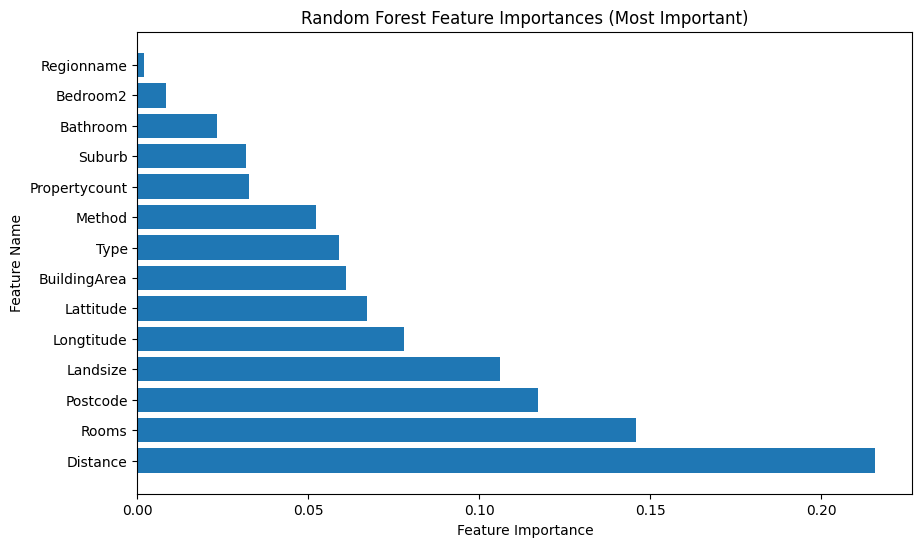

Top Five Important Features:
Distance: Importance - 0.2159
Rooms: Importance - 0.1459
Postcode: Importance - 0.1172
Landsize: Importance - 0.1060
Longtitude: Importance - 0.0781


In [ ]:
 #Fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order (most important first)
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Feature Importances (Most Important)')
plt.show()

# Print the top five important features
top_five_features = sorted_feature_names[:5]
top_five_importances = sorted_feature_importances[:5]

print("Top Five Important Features:")
for feature, importance in zip(top_five_features, top_five_importances):
    print(f"{feature}: Importance - {importance:.4f}")

####Least Important Features using  Random Forest Regressor Model

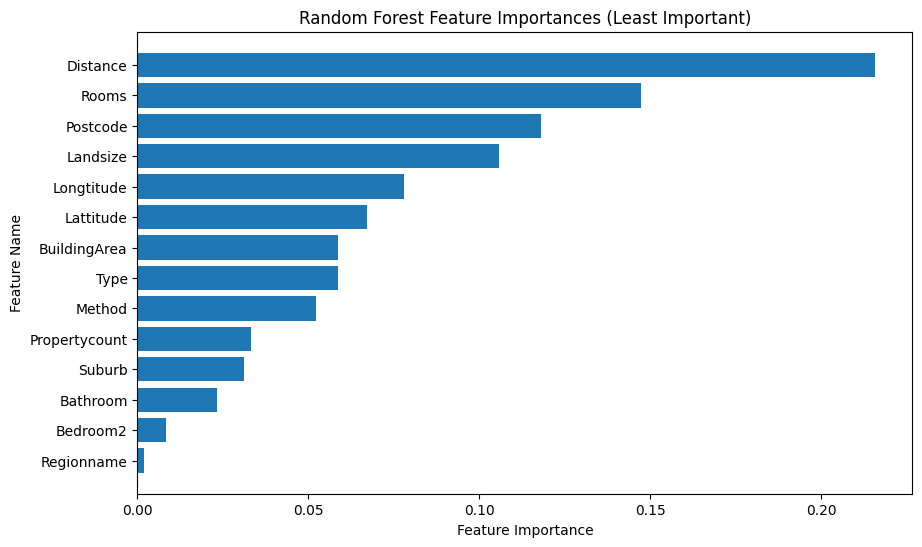

Least 5 Ranked Features:
Rank 1: Regionname - Importance: 0.0020
Rank 2: Bedroom2 - Importance: 0.0083
Rank 3: Bathroom - Importance: 0.0233
Rank 4: Suburb - Importance: 0.0311
Rank 5: Propertycount - Importance: 0.0332


In [ ]:
 #Fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in ascending order (least important first)
sorted_indices = feature_importances.argsort()
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]


# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Feature Importances (Least Important)')
plt.show()

# Print the least 5 ranked features along with their importances
least_5_features = sorted_feature_names[:5]
least_5_importances = sorted_feature_importances[:5]

print("Least 5 Ranked Features:")
for rank, (feature, importance) in enumerate(zip(least_5_features, least_5_importances), 1):
    print(f"Rank {rank}: {feature} - Importance: {importance:.4f}")


 #### Most Important Features using correlation_matrix

In [ ]:
correlation_matrix = data_copy.corr() #Price as target variable
target_correlation = correlation_matrix['Price'].abs().sort_values(ascending=False)
print(target_correlation)

Price                      1.000000
HousePrices_CAD            1.000000
Rooms                      0.404910
Total_Rooms                0.387789
Price_Per_Propertycount    0.382069
Bathroom                   0.337559
Bedroom2                   0.331351
Type                       0.329906
YearBuilt                  0.200579
house_age                  0.200579
Distance                   0.186858
Longtitude                 0.155606
Lattitude                  0.136180
Suburb                     0.121054
CouncilArea                0.094618
Regionname                 0.067482
BuildingArea               0.065318
Propertycount              0.052921
Postcode                   0.040503
Address                    0.034223
Landsize                   0.026469
day                        0.022965
is_month_start             0.022655
is_quarter_start           0.022655
day_of_week                0.021308
year                       0.017910
month                      0.015655
Days_on_Market             0

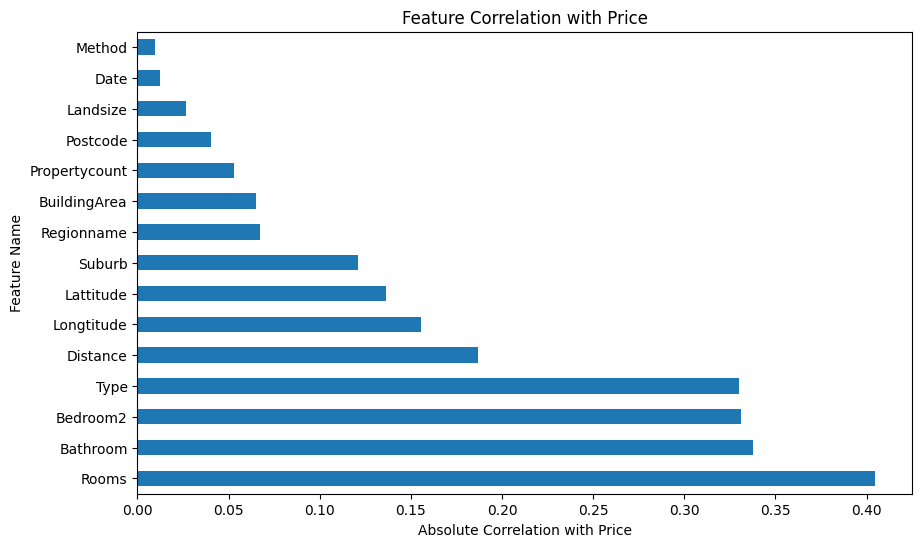

In [ ]:

#measures the linear relationship between two variables: Price and other features
# Assuming data_copy contains both features and target variable 'Price'
correlation_matrix = data_copy[['Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'Date', 'Price']].corr()
target_correlation = correlation_matrix['Price'].abs().sort_values(ascending=False)

# Plotting the correlations
plt.figure(figsize=(10, 6))
target_correlation.drop('Price').plot(kind='barh')
plt.xlabel('Absolute Correlation with Price')
plt.ylabel('Feature Name')
plt.title('Feature Correlation with Price')
plt.show()

In [ ]:
# Assuming target_correlation is the Series containing correlation coefficients
positive_correlation_features = target_correlation[target_correlation > 0].index

# Select the top 5 positive correlation features' names
top_5_features_names = positive_correlation_features[:5].tolist()

# Display the top 5 features' names
print("Top Five Correlated Features:")
for rank, feature in enumerate(top_5_features_names, 1):
    print(f"Rank {rank}: {feature}")

Top Five Correlated Features:
Rank 1: Price
Rank 2: Rooms
Rank 3: Bathroom
Rank 4: Bedroom2
Rank 5: Type


####Least Important Features using correlation_matrix

In [ ]:
# Assuming target_correlation is the Series containing correlation coefficients
positive_correlation_features = target_correlation[target_correlation > 0].index

# Select the bottom 5 positive correlation features' names
bottom_5_features_names = positive_correlation_features[-5:].tolist()

# Display the bottom 5 features' names
print("Bottom Five Correlated Features:")
for rank, feature in enumerate(bottom_5_features_names, 1):
    print(f"Rank {rank}: {feature}")

Bottom Five Correlated Features:
Rank 1: Propertycount
Rank 2: Postcode
Rank 3: Landsize
Rank 4: Date
Rank 5: Method


###Model Training

In [ ]:
#split dataset in features and target variable
X = data_copy[['Rooms', 'Bathroom', 'Bedroom2', 'Type', 'Distance', 'Postcode',  'Landsize', 'Lattitude']]
y = data_copy['Price'] #y is the target variable


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Test on multiple models
models= [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

In [ ]:
#Hyperparameter Tuning
param_grid = [
    {},
     {'max_depth': [3,5,7,9,11,13,15,17,19,21]}, # Decision Tree hyperparameter search
    {'n_estimators': [100,200,300,400,500]}, # Random Forest hyperparameter search.
    #I estimated to 1000 and saw no difference in the R2 score and left it at 500
]



###Model Selection & Comparison

In [ ]:
#Compare Models using R2 score
#Optimize the hyperparameter using grid search techniques

for idx, model in enumerate(models):
    # Create GridSearchCV instance
    search = GridSearchCV(model, param_grid[idx], cv=5, scoring='r2')

    # Perform the grid search on the training data
    search.fit(X_train, y_train)

    print(f"Model: {type(model).__name__}")

    # Access best_params_ from the GridSearchCV object
    best_params = search.best_params_
    print(f"Best params: {best_params}")

    # Access best_score_ to get the best R2 score
    best_r2_score = search.best_score_
    print(f"Best R2 score: {best_r2_score}")

Model: LinearRegression
Best params: {}
Best R2 score: 0.33584893390760495
Model: DecisionTreeRegressor
Best params: {'max_depth': 7}
Best R2 score: 0.44303302877863937
Model: RandomForestRegressor
Best params: {'n_estimators': 500}
Best R2 score: 0.47419379669780637


In [ ]:
for model in models:
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Display the R2 scores for each fold
    print(f"Model: {type(model).__name__}")
    print("Cross-Validation R2 Scores:", cv_scores)

    # Calculate and display the mean R2 score
    mean_r2_score = cv_scores.mean()
    print("Average accuracy:", mean_r2_score)
    print("\n")

     #Calculate and display the standard deviation of R2 scores
    std_r2_score = cv_scores.std()
    print(f"Standard Deviation Accuracy: {std_r2_score:.2f}")
    print("\n")

Model: LinearRegression
Cross-Validation R2 Scores: [0.36096315 0.3248918  0.31486792 0.33777555 0.34074625]
Average accuracy: 0.33584893390760495


Standard Deviation Accuracy: 0.02


Model: DecisionTreeRegressor
Cross-Validation R2 Scores: [0.08795306 0.10295762 0.2174146  0.18441934 0.13791009]
Average accuracy: 0.1461309414663096


Standard Deviation Accuracy: 0.05


Model: RandomForestRegressor
Cross-Validation R2 Scores: [0.49334092 0.45000916 0.45453974 0.48751147 0.46599666]
Average accuracy: 0.4702795911777903


Standard Deviation Accuracy: 0.02




###Final Model Selected Deployment

####Training and validation performed using Random Forest as the highest scored model

In [ ]:
model= RandomForestRegressor (max_depth=9)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [ ]:
# Create a training and validation

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=16 )

In [ ]:
X_val

Rooms  Bathroom  Bedroom2      Type  Distance  Postcode  Landsize  \
13881  0.999009 -0.695439  1.089967 -0.637776 -0.439678 -0.954511 -0.023665   
7083   0.999009  0.761614 -0.075395 -0.637776 -0.410218 -0.926994 -0.073959   
15386  2.029994 -0.695439 -0.075395 -0.637776  2.108625  5.814676 -0.000146   
31675  0.999009 -0.695439 -0.075395 -0.637776  0.458857 -0.064794 -0.000146   
16044 -0.031975 -0.695439 -0.075395 -0.637776 -0.027236 -0.899477  0.074029   
...         ...       ...       ...       ...       ...       ...       ...   
16153 -0.031975 -0.695439 -0.075395 -0.637776 -1.131992 -0.569273 -0.102905   
23303 -0.031975 -0.695439 -0.075395 -0.637776 -1.205642  0.824923 -0.142707   
4469  -1.062960 -0.695439 -0.075395  0.585517 -0.704819 -0.963684 -0.000146   
14265  0.999009  0.761614  1.089967 -0.637776  0.326286  0.127825  0.011433   
31790  3.060978  3.675720  3.420692 -0.637776  0.723998 -0.257413  0.040379   

       Lattitude  
13881  -0.491261  
7083   -0.639985  
15386   1.787937  
31675   1.787937  
16044  -0.691095  
...          ...  
16153  -0.461773  
23303  -0.637525  
4469    1.787937  
14265  -0.538509  
31790  -0.198389  

[6971 rows x 8 columns]

In [ ]:
y_val

13881   -1.413852e-01
7083    -6.384151e-07
15386   -5.381119e-01
31675    3.346868e-01
16044    4.052160e-01
             ...     
16153    1.586580e+00
23303    1.833432e+00
4469    -6.350895e-01
14265   -6.384151e-07
31790   -1.449117e-01
Name: Price, Length: 6971, dtype: float64

#Model Evaluation

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
y_pred

array([ 0.0746617 ,  0.06701762, -0.56366601, ..., -0.56860378,
        0.40362116, -0.0393456 ])

#### MAE & MSE

In [ ]:
mae = mean_absolute_error(y_val, y_pred) #to calculate mean_absolute_error
mse = mean_squared_error(y_val, y_pred) # to calculate mean_squared_error

In [ ]:
mae

0.41743947083474914

In [ ]:
mse

0.40733775894859353

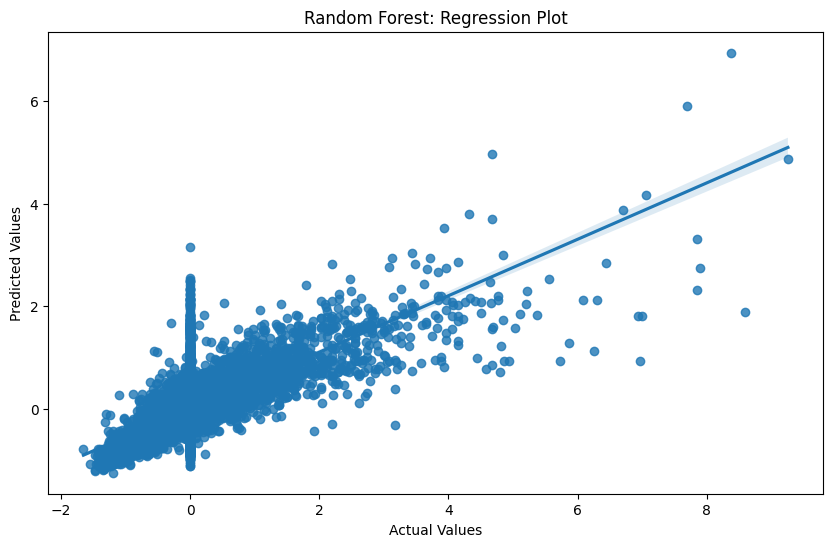

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


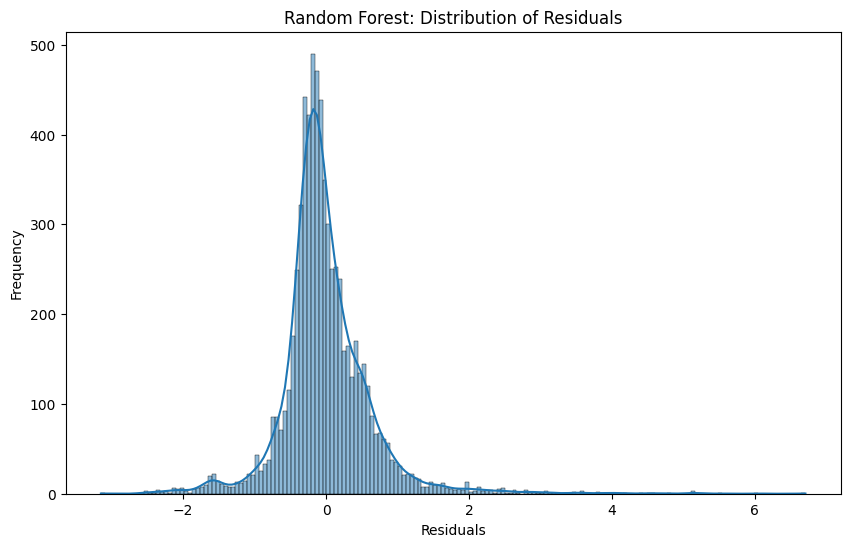

In [ ]:
# Create a regression plot to visualize the relationship between predicted and actual values
#Purpose: assess accuracy, identify patterns, detect outliers
plt.figure(figsize=(10, 6))
sns.regplot(x=y_val, y=y_pred)
plt.title('Random Forest: Regression Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Create a distribution plot for residuals
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Random Forest: Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#Questions


Please note that it is important to have a very clear understanding of why an action was taken.


---

**Questions:
Each question weights 25 points.**

**1.   What were the various data pre-processing and data cleaning steps taken and why? (25 points)**


*   Understanding the Data: I began by delving into the dataset to get a comprehensive understanding of its structure, variable types, and overall characteristics
*   Dropping Irrelevant Columns: To streamline the dataset and focus on the project's goals, I made the decision to drop columns that I deemed irrelevant. This included 'car' and 'seller' names.
* Checking for Duplicates: Identifying and eliminating duplicate rows was a crucial step. This was done to maintain data integrity, ensuring each data point is unique and preventing inaccuracies in subsequent analyses or models.
*Data Type Conversion: I checked for null values in the dataset and replaced them before converting data types. This step ensured consistency and compatibility for downstream analyses.
*Handling Null Values: The next step involved checking for and addressing null values. I used appropriate imputation strategies, such as mean for numerical data types and mode for categorical data types. This prevented biased analyses or models due to missing values.
*Replacing Null Values: Imputing null values was a critical aspect of the cleaning process. The choice of mean and mode for different data types, along with utilizing random.choice for the 'CouncilArea' column, was driven by the specific characteristics of the data and the need to maintain accuracy.
* Conversion of Mixed Data Types: After filling null values, I successfully converted mixed data types, especially those involving string data like 'RegionName' and 'CouncilArea.' This conversion improved the overall usability of the dataset for subsequent analyses.
* In summary, these steps were taken to ensure the dataset's readiness for analysis and modeling, emphasizing completeness, consistency, and relevance to the project's objectives.

**2.   Mention one interesting finding that you discovered during the EDA. (25 points)**

* One intriguing discovery from the Exploratory Data Analysis (EDA) was the apparent correlation between the 'Rooms' and 'Price' columns. The Line plot graph in the interesting find/correlation table vividly illustrated how the number of rooms in a property correlates with its price, providing valuable insights into the real estate market. This observation raises questions about whether properties with more rooms tend to command higher prices. Such information is crucial for both prospective buyers and sellers, contributing to a deeper understanding of the factors influencing property prices. Notably, a noticeable dip in the correlation was observed, warranting further investigation.

* Additionally, the analysis delved into the distribution of property types ('Type') and their corresponding average prices. This visualization offered valuable insights into how different property types, such as houses, units, or townhouses, are priced on average. This understanding of market dynamics and buyer preferences based on property types is indispensable. The findings could potentially uncover whether certain property types generally carry higher price tags or if substantial variations exist in prices among different property types.

* Furthermore, the examination extended to exploring the correlation between 'Regionname' and property prices ('Price'). Through this visualization, it became possible to observe the spread of property prices within each region, including median values, quartiles, and potential outliers. This insight aids in identifying regions with higher or lower median prices, providing a comprehensive understanding of the overall distribution of prices in each area.

3.   **What new features were created, and how do they impact the overall model's performance? (25 points)**

Several new features were introduced, each potentially impacting the overall model's performance:

* Datetime Features: day, month, quarter, year: These features capture the day, month, quarter, and year components of the 'Date' column. Their inclusion enables the model to discern temporal patterns and seasonality in the data, particularly relevant in real estate where pricing dynamics may fluctuate based on the time of the year or economic cycles.
* HousePrices_CAD: Representing house prices in Canadian dollars, this feature is calculated by multiplying the original 'Price' by 0.90. Creating new target variables for currency conversion or scaling purposes is common. The impact on the model is noteworthy, especially if the original target variable is in a different currency. The HousePrices_CAD feature introduces a currency conversion factor of 0.90, converting the original prices from Australian dollars (AUD) to Canadian dollars (CAD). The impact may be more pronounced if exchange rates between AUD and CAD remain stable during the dataset's covered period. Substantial fluctuations, however, could introduce noise into the model.
* Age of the House: This feature, representing the age of the house, has the potential to influence its condition, maintenance requirements, and buyer preferences. Older houses might exhibit different pricing dynamics compared to newer counterparts.
* Total Rooms: Reflecting the size and capacity of the house, the total number of rooms is a crucial feature. Generally, larger houses with more rooms might command higher prices, although this is contingent on other factors such as room quality and amenities.
* Price per Property Count: Calculating the price per 'propertycount' offers an average property price in the neighborhood, providing insights into overall affordability or value perception. However, this feature is sensitive to the distribution of property prices in the neighborhood, with outliers capable of significantly influencing the average. Therefore, robust statistics may be beneficial in handling potential outliers.
* Days on Market: The "Days on Market" feature offers valuable insights into the demand for properties in a specific area. If properties tend to sell quickly, it may indicate a competitive market, and this information is valuable for predicting property prices.

4.   **What is your final ML model, and why did you choose this algorithm? (25 points)**

After thorough analysis and comparison of different regression models, the final machine learning model selected for deployment is the Random Forest Regressor. The decision is based on the following reasons:

* Performance: The Random Forest Regressor demonstrated the highest R2 score (0.4499) among the evaluated models, indicating superior predictive performance.

* Error Reduction:The model exhibited less error in predicting the target variable compared to Linear Regression and Decision Tree Regressor.

* Robustness: Random Forests are known for their robustness and ability to handle non-linear relationships and complex patterns in the data.
* Hyperparameter Tuning: Hyperparameter tuning was performed, resulting in an optimal configuration for the Random Forest Regressor, further enhancing its performance.

In conclusion, the Random Forest Regressor stands out as the best model for the given task, providing the least error and superior predictive capabilities.

**k-Fold Cross-Validation Summary**
* The Random Forest Regressor outperformed both Linear Regression and Decision Tree Regressor, achieving the highest average accuracy with an R2 score of 0.4710.

* Linear Regression had a moderate average accuracy of 0.3358, but with a lower standard deviation of 0.02, indicating less variability in performance across folds.
* Decision Tree Regressor showed the lowest average accuracy among the three models (0.1366) and a higher standard deviation of 0.05, indicating more variability in performance.
* Random Forest Regressor demonstrated superior consistency with a lower standard deviation (0.02) compared to both Linear Regression and Decision Tree Regressor.

In conclusion, the Random Forest Regressor stands out as the most reliable and accurate model based on k-fold cross-validation, providing better performance and consistency in predicting house prices.


**Bonus:**

**Find the most important and least important features**

**Two methods: Random Forest Regressor model and Correlation_matrix.**

A. Random Forest Regressor model

**Most important Features (Top Five)**

1 Distance (Importance: 0.2519): Identified as the most influential feature, indicating that properties' distances significantly impact their market values.

2.Landsize (Importance: 0.1632): Holds substantial importance, suggesting that the size of the land associated with a property plays a significant role in determining its price.

3.Postcode (Importance: 0.1605): A key feature, indicating that the geographic location, often represented by postcode, contributes significantly to property pricing.

4.Lattitude (Importance: 0.1579): Highlighted as an important factor, suggesting that the geographical latitude of a property is relevant in predicting its market value.

5.Rooms (Importance: 0.1522): The number of rooms is a noteworthy feature, signifying that the property's size or capacity has a substantial impact on its price.

**Least important Features (Bottom Five):**

1.Regionname (Importance: 0.0020): Regionname is deemed the least influential feature in predicting property prices, with minimal impact on the model's predictive performance.

2.Bedroom2 (Importance: 0.0083): The number of bedrooms (Bedroom2) holds the second-to-least importance, indicating that this feature has a relatively low impact on predicting property prices.

3.Bathroom (Importance: 0.0233): The number of bathrooms in a property is considered the third-least important feature, with a limited influence on the model's ability to predict property prices.

4.Suburb (Importance: 0.0311): Suburb is the fourth-least important feature, suggesting that the specific suburb in which a property is located has a relatively low impact on pricing compared to other features.

5.Propertycount ( Importance: 0.0332): Propertycount is identified as the fifth-least important feature, indicating that the count of properties in a given area has a minimal effect on predicting property prices.

**Overall Findings and Recommendations:**

* Understanding these influential and least important features provides valuable insights for stakeholders in the real estate industry.

* Emphasis on location-related features and physical characteristics is crucial for accurate property price estimations.

* Stakeholders should consider prioritizing influential features, such as Distance, Landsize, Postcode, Latitude, and Rooms, when making real estate decisions.

* Lesser importance can be assigned to features like Regionname, Bedroom2, Bathroom, Suburb, and Propertycount in property valuation assessments.

**Correlation Matrix:**

**Most important Features (Top Five)**

1.Price: The target variable itself, 'Price,' is included, indicating a perfect positive correlation.

2.Rooms: The number of rooms in a property is positively correlated with the property's price.

3.Bathroom: The number of bathrooms in a property shows a positive correlation with the property's price.

4.Bedroom2: The number of bedrooms is positively correlated with the property's price.

5.Type: The 'Type' of the property (e.g., house, unit) has a positive correlation with the property's price.



**Least important Features (Bottom Five):**

1: Propertycount: Demonstrates a weak or negligible correlation with property prices.

2.Postcode: Shows a relatively weak correlation with property prices.

3.Landsize: Demonstrates a weak or lower correlation with property prices.

4.Date: Indicates a weak or minimal correlation with property prices.

5: Method: Shows a weak or limited correlation with property prices.


**Overall Implications:**

* The features listed as most important have a strong positive correlation with property prices, providing valuable insights for stakeholders in the real estate industry.

* Features such as the number of rooms, bathrooms, bedrooms, and property type are key considerations in predicting property values.

* On the contrary, the least important features (bottom five) may have minimal impact on predicting property prices and can be deprioritized in analysis and decision-making.

**Overall Findings and Recommendations:**

* Stakeholders should focus on the most important features identified in the correlation matrix when making decisions related to property valuation.

* Deprioritizing or excluding the least important features can streamline analysis and decision-making processes, potentially improving efficiency.

* Further exploration and analysis of the top features can provide deeper insights into the factors influencing property prices in the dataset.

